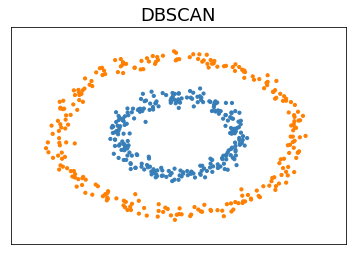

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

 
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

default_base = {
    "quantile": 0.2,
    "eps": 0.3,
    "damping": 0.77,
    "preference": -240,
    "n_neighbors": 3,
    "n_clusters": 2,
    "min_samples": 7,
    "xi": 0.08,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
]


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
#     params.update(algo_params)

    X, y = noisy_circles

    X = StandardScaler().fit_transform(X)

    dbscan = cluster.DBSCAN(eps=params["eps"])

    clustering_algorithms = (
        ("DBSCAN", dbscan),
    )

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )

        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

plt.show()